# O que é K-means **Clustering**?

**K-means clustering** é um algoritmo de aprendizado *não supervisionado* utilizado para **agrupamento de dados**. Seu objetivo é particionar um conjunto de dados em *k* grupos (ou clusters) baseados em similaridade. O método é amplamente usado em diversas áreas, como análise de dados, reconhecimento de padrões e aprendizado de máquina.

## Como funciona o K-means?

O K-means funciona iterativamente para encontrar os centros dos clusters, chamados de *centroides*, e atribuir os dados a esses clusters da seguinte forma:

1. **Escolha do número de clusters** (*k*): O usuário define o número de grupos que deseja identificar no conjunto de dados.

2. **Inicialização dos centroides**: Inicialmente, *k* centroides são posicionados aleatoriamente (ou baseados em algum método de inicialização).

3. **Atribuição dos pontos aos clusters**: Cada ponto de dados é atribuído ao cluster cujo centroide está mais próximo, com base em uma métrica de distância, geralmente a **distância euclidiana**.

4. **Atualização dos centroides**: Após a atribuição dos pontos aos clusters, os centroides são recalculados como a média dos pontos pertencentes a cada cluster.

5. **Repetição**: Os passos 3 e 4 são repetidos até que os centroides não mudem mais significativamente ou um critério de convergência seja alcançado.

## Fórmula Matemática do K-means

O objetivo do K-means é minimizar a **soma dos erros quadrados dentro do cluster** (Within-Cluster Sum of Squares - WCSS). A função de custo que o K-means tenta minimizar pode ser expressa da seguinte forma:

$$
J = \sum_{i=1}^{k} \sum_{x \in C_i} \lVert x - \mu_i \rVert^2
$$

Onde:

- $J$ é o valor da função objetivo que o K-means tenta minimizar.
- $k$ é o número de clusters.
- $C_i$ é o conjunto de pontos atribuídos ao cluster $i$.
- $x$ é um ponto de dados.
- $\mu_i$ é o centroide do cluster $i$.
- $\lVert x - \mu_i \rVert^2$ é a distância euclidiana quadrada entre o ponto $x$ e o centroide $\mu_i$.

O algoritmo busca minimizar a soma das distâncias quadradas entre os pontos de dados e seus respectivos centroides.

## Vantagens do K-means

- Simplicidade: O algoritmo é fácil de entender e implementar.
- Escalabilidade: Funciona bem com grandes conjuntos de dados.
- Eficiência: A complexidade computacional é relativamente baixa.

## Desvantagens do K-means

- Escolha do número *k*: O número de clusters precisa ser definido antecipadamente, o que pode ser difícil em muitos casos.
- Sensibilidade a outliers: Pontos de dados muito distantes podem influenciar negativamente a formação dos clusters.
- Dependência da inicialização: O resultado pode variar dependendo da escolha inicial dos centroides.

## Aplicações do K-means

- **Segmentação de clientes**: Agrupar clientes com base em comportamentos de compra.
- **Compressão de imagens**: Reduzir o número de cores em uma imagem agrupando cores similares.
- **Análise de padrões**: Detectar padrões em conjuntos de dados não rotulados.

O K-means é um algoritmo poderoso e versátil, mas deve ser usado com cuidado, especialmente em casos onde os dados possuem formas complexas ou outliers.


In [44]:
using Statistics
using Random
using Plots
theme(:bright)

In [4]:
function initialize_centroids(X, k)
    return X[randperm(size(X, 1))[1:k], :]
end

initialize_centroids (generic function with 1 method)

In [5]:
function assign_clusters(X, centroids)
    distances = [sum((x .- centroid).^2) for x in eachrow(X), centroid in eachrow(centroids)]
    min_indices = map(row -> argmin(row), eachrow(distances))
    return min_indices    
end

assign_clusters (generic function with 1 method)

In [6]:
function update_centroids(X, cluster_assigment, k)
    centroids = zeros(k, size(X, 2))

    for i in 1:k
        cluster_points = X[findall(cluster_assigment .== i), :]

        if size(cluster_points, 1) > 0
            centroids[i, :] = mean(cluster_points, dims=1)
        else
            println("Cluster $i has no points assigned; keep centroid unchanged.")
        end
    end
    return centroids  
end

update_centroids (generic function with 1 method)

In [10]:
function kmeans_function(X, k, max_iters=100)
    centroids = initialize_centroids(X, k)
    prev_centroids = nothing
    cluster_assigment = zeros(Int, size(X, 1))

    for iter in 1:max_iters
        # Assign clusters based on current centroids
        cluster_assigment = assign_clusters(X, centroids)

        # Update centroids based on current cluster assignment
        centroids = update_centroids(X, cluster_assigment, k)

        # Check for convergence
        if prev_centroids !== nothing && all(centroids .≈ prev_centroids)
            println("Converged after $iter iterations.")
            break
        end    

        # Update prev_centroids for the next iteration
        prev_centroids = copy(centroids)
    end

    return centroids, cluster_assigment
end


kmeans_function (generic function with 2 methods)

In [11]:
function plot_clusters(X, centroids, cluster_assigment)
    cluster_ids = unique(cluster_assigment)

    scatter()
    for cluster_id in cluster_ids
        cluster_points = X[cluster_assigment .==cluster_id, :]
        scatter!(cluster_points[:, 1], cluster_points[:, 2], label = "Cluster $cluster_id")
    end

    scatter!(centroids[:, 1], centroids[:, 2], color=:red, marker=:star, ms=10, label="Centroids")
    xlabel!("Feature 1")
    ylabel!("Feature 2")
    title!("K-Means Clustering")    
end

plot_clusters (generic function with 1 method)

Converged after 3 iterations.


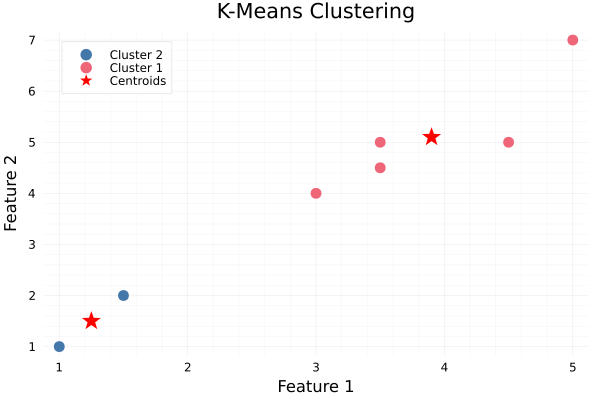

In [45]:
X = [1.0 1.0;
    1.5 2.0;
    3.0 4.0;
    5.0 7.0;
    3.5 5.0;
    4.5 5.0;
    3.5 4.5]

k = 2

centroids, cluster_assigment = kmeans_function(X, k)

plot_clusters(X, centroids, cluster_assigment)

TESTE CHATGPT


In [15]:
# Instale os pacotes necessários
using Random
using Clustering
using Plots

In [39]:
# Passo 1: Gerar dados fictícios
Random.seed!(1234)  # Para reprodutibilidade
n = 100  # Número de pontos em cada cluster

# Corrigir a operação com broadcasting correto
data = vcat(randn(n, 2) .+ [-5 -5],  # Cluster 1
            randn(n, 2) .+ [5 5],    # Cluster 2
            randn(n, 2) .+ [-5 5])   # Cluster 3

300×2 Matrix{Float64}:
 -4.02934  -4.73754
 -5.97922  -5.02224
 -4.09814  -5.39129
 -5.0328   -4.97238
 -5.60079  -7.29076
 -6.44518  -5.66854
 -2.29258  -5.78469
 -3.47555  -3.87101
 -4.2402   -4.78882
 -5.88144  -4.28536
  ⋮        
 -3.27302   4.17966
 -5.88527   2.81276
 -4.17188   6.09404
 -2.46295   4.89909
 -5.02839   5.16711
 -5.71754   6.63942
 -5.86268   5.51742
 -4.11529   4.8376
 -3.1447    4.63704

In [42]:
# Passo 2: Aplicar o algoritmo de K-means
k = 3  # Número de clusters
result = kmeans(data', k)  # Note que `data'` transpõe a matriz para kmeans

KmeansResult{Matrix{Float64}, Float64, Int64}([-5.071755841103468 -4.945344217898755 5.000800516348213; 4.989784499364663 -5.202138426453111 4.8756984629159215], [2, 2, 2, 2, 2, 2, 2, 2, 2, 2  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1], [1.0549045543423574, 1.1012578452015305, 0.7535359036083946, 0.06043827169976623, 4.791965286167169, 2.4670282022463113, 7.376541026879721, 3.9321794787641267, 0.6680640121543746, 1.7167564665648172  …  9.749595249223042, 3.8917599856135325, 5.401255072434253, 2.0291677671354194, 6.814115395832957, 0.0333243525695508, 3.1383316106821013, 0.9039580215700767, 0.9379840383824529, 3.8379673350891466], [100, 100, 100], [100, 100, 100], 648.8917845695876, 2, true)

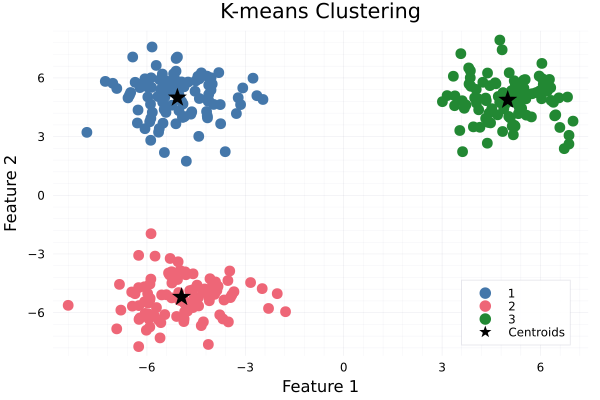

In [52]:
# Passo 3: Visualizar os clusters
scatter(data[:, 1], data[:, 2], 
    group=result.assignments,  # Colore os pontos de acordo com o cluster
    legend=false, title="K-means Clustering",
    xlabel="Feature 1", ylabel="Feature 2")
# Adicionar os centros dos clusters ao gráfico
scatter!(result.centers[1, :], result.centers[2, :], 
    marker=:star5, ms=10, label="Centroids", c=:black, legend=true)